### Detalii de abordare

https://towardsdatascience.com/graph-laplacian-and-its-application-in-machine-learning-7d9aab021d16

https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

Pride
Elation
Joy
Satisfaction
Relief
Hope
Interest
Surprise
Sadness
Fear
Shame
Guilt
Envy
Disgust
Contempt
Anger



The participant ratings, physiological recordings and face video of an experiment where 32 volunteers watched a subset of 40 of the above music videos. EEG and physiological signals were recorded and each participant also rated the videos as above. For 22 participants frontal face video was also recorded.

63 secunde semnal



1) Starile emotionale sunt marcate in doua formate: numere intregi de la 1-9 si numere de la 1-9 pe interval continuu
2) Normalizarea labelurilor cu toate datele acestuia ( informatiile de la toti subiectii)


In [1]:
import numpy as np
import _pickle as cPickle
import matplotlib.pyplot as plt

In [2]:
with open('data/s01.dat', 'rb') as f:
     data = cPickle.load(f, encoding='latin1')

In [3]:
data['data'][0].shape

(40, 8064)

In [4]:
corr_matrix = np.corrcoef(data['data'][0][:32, :])

In [5]:
data

{'labels': array([[7.71, 7.6 , 6.9 , 7.83],
        [8.1 , 7.31, 7.28, 8.47],
        [8.58, 7.54, 9.  , 7.08],
        [4.94, 6.01, 6.12, 8.06],
        [6.96, 3.92, 7.19, 6.05],
        [8.27, 3.92, 7.  , 8.03],
        [7.44, 3.73, 7.08, 7.04],
        [7.32, 2.55, 6.32, 5.87],
        [4.04, 3.29, 3.62, 5.99],
        [1.99, 4.86, 2.04, 7.09],
        [2.99, 2.36, 3.63, 6.24],
        [2.71, 2.77, 3.4 , 7.35],
        [1.95, 3.12, 2.87, 6.18],
        [4.18, 2.24, 3.04, 5.04],
        [3.17, 8.08, 2.91, 5.04],
        [6.81, 7.44, 8.15, 7.14],
        [2.46, 6.91, 6.77, 6.41],
        [7.23, 7.15, 6.94, 8.01],
        [7.17, 8.  , 8.1 , 6.79],
        [8.26, 7.91, 7.19, 8.13],
        [9.  , 7.95, 8.37, 7.86],
        [7.09, 2.08, 7.06, 7.37],
        [8.15, 3.01, 7.37, 7.9 ],
        [7.04, 7.09, 8.01, 8.22],
        [8.86, 7.21, 8.65, 7.21],
        [7.28, 7.27, 7.41, 8.24],
        [7.35, 6.95, 7.03, 7.29],
        [3.88, 3.35, 4.01, 7.87],
        [1.36, 2.27, 3.  , 8.14],
    

In [6]:
corr_matrix = np.abs(corr_matrix)

In [10]:
adj_matrix = corr_matrix - np.identity(corr_matrix.shape[0])

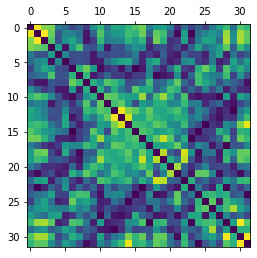

In [11]:
plt.matshow(adj_matrix)
plt.show()

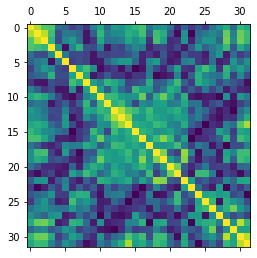

In [7]:
plt.matshow(corr_matrix)
plt.show()

In [12]:
# L = D-W
# D: Degree matrix
# W: Similarity graph
    
degree_matrix = adj_matrix.sum(axis=1)
diagonal_matrix = np.diag(degree_matrix)
L =  diagonal_matrix - corr_matrix

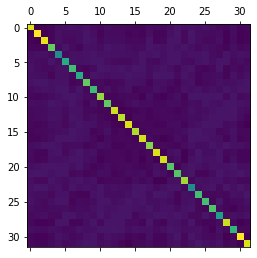

In [13]:
plt.matshow(L)
plt.show()

In [18]:
np.expand_dims(L, axis=0).shape

(1, 32, 32)

In [24]:
eigen_values, eigen_vectors = np.linalg.eig(L)

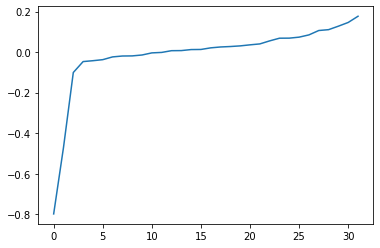

In [33]:
plt.plot(sorted(eigen_vectors[1]))